# 1. Standard Scaling

`Standard scaling` is a method of scaling the data such that the distribution of the data is centered around 0, with a standard deviation of 1. This is done by subtracting the mean of the data from each data point and then dividing by the standard deviation of the data. This is a very common method of scaling data, and is used in many machine learning algorithms.
# 2. Max-Abs Scaling
`Max-Abs Scaling` is a method of scaling the data where each feature is scaled by its maximum absolute value. This ensures that the data is scaled within the range of **`-1 to 1`**, without changing the sign of the data.
# 3. Min-Max Scaling
`Min-Max Scaling` is a method of scaling the data where each feature is rescaled to a fixed range, typically **`[0, 1]`**. This is done by subtracting the minimum value of the feature and then dividing by the range (maximum - minimum) of the feature.
# 4. Robust Scaling
`Robust Scaling` is a method of scaling the data that is less sensitive to outliers compared to Standard Scaling. It scales the data using the median and the interquartile range (IQR) instead of the mean and standard deviation. This makes it more robust, as outliers have less influence on the scaling.
> Note: Robust Scaling is specifically designed to handle outliers better than other scaling methods like Standard Scaling or Min-Max Scaling. Because median is less affected by outliers than mean, it is a better choice when dealing with outliers.

> Note: if data have **`-ve values`** then use `Standard Scaling` or `Max-Abs Scaling`\
> Note: if data have **`+ve`** values then use `Min-Max Scaling`
> Note: Min-Max Scaling is also known as Normalization.\
> Note: Standard Scaling is also known as Z-score normalization.\
> Note: Max-Abs Scaling is also known as Unit Scaling.

In [1]:
# import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

In [2]:
# make an example dataset
df = {
    'age': [25,30,35,40,45],
    'height': [165,170,175,180,185],
    'weight': [55,60,65,70,75]
}

# conver this data to pandas datafram
df = pd.DataFrame(df)
df.head()

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


In [3]:
# import the scalar
scalar = StandardScaler()

# fit the scalar on data
scaled_df = scalar.fit_transform(df)
scaled_df
# convert this data into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214


# Max ABS scalar

In [ ]:
# import the scalar
scalar = MaxAbsScaler()

# fit the scalar on data
scaled_df = scalar.fit_transform(df)
# for specific columns
# scaled_df = scalar.fit_transform(df['columns name'])
scaled_df
# convert this data into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,0.555556,0.891892,0.733333
1,0.666667,0.918919,0.800000
2,0.777778,0.945946,0.866667
3,0.888889,0.972973,0.933333
4,1.000000,1.000000,1.000000


# min-max scalar

In [ ]:
# import the scalar
scalar = MinMaxScaler()

# fit the scalar on data
scaled_df = scalar.fit_transform(df)
# convert this data into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,0.00,0.00,0.00
1,0.25,0.25,0.25
2,0.50,0.50,0.50
3,0.75,0.75,0.75
4,1.00,1.00,1.00


# RobustScaler

In [5]:
from sklearn.preprocessing import RobustScaler

# import the scalar
scalar = RobustScaler()

# fit the scalar on data
scaled_df = scalar.fit_transform(df)
scaled_df
# convert this data into a pandas dataframe
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,-1.0,-1.0,-1.0
1,-0.5,-0.5,-0.5
2,0.0,0.0,0.0
3,0.5,0.5,0.5
4,1.0,1.0,1.0


---
# Transformation

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# generate non-normal data (exponential Distribution)
np.random.seed(0)
df = np.random.exponential(size=1000, scale=2)
# convert this data into a pandas dataframe
df = pd.DataFrame(df, columns=['values'])
df.head()

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


In [10]:
df.shape

(1000, 1)

<Axes: xlabel='values', ylabel='Count'>

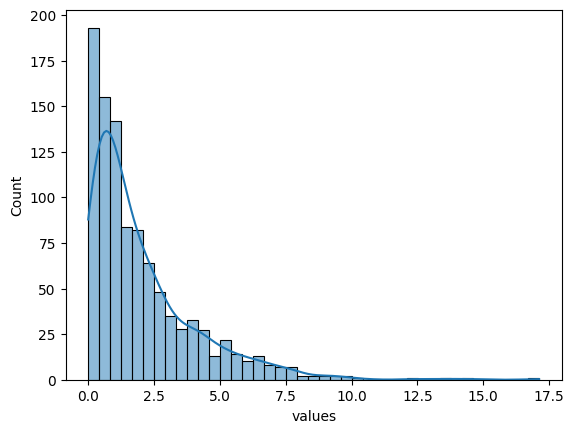

In [15]:
sns.histplot(df['values'], kde=True)

In [12]:
df.min() # minimum value is 0 it mean data is not -ve

values    0.001092
dtype: float64

#### As data is right skewd so we use transformation to make it normal

#### for box-cox method data must be postive

In [14]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

pt_boxcox = PowerTransformer(method='box-cox', standardize=False)
pt_yeo_johnson = PowerTransformer(method='yeo-johnson', standardize=False)
qt_normal = QuantileTransformer(output_distribution='normal')

# boxbcox k liay data must be postive
df['Box_Cox'] = pt_boxcox.fit_transform(df[['values']] + 1)
df['Yeo_Johnson'] = pt_yeo_johnson.fit_transform(df[['values']])
df['Quantile'] = qt_normal.fit_transform(df[['values']])

In [13]:
df.head()

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


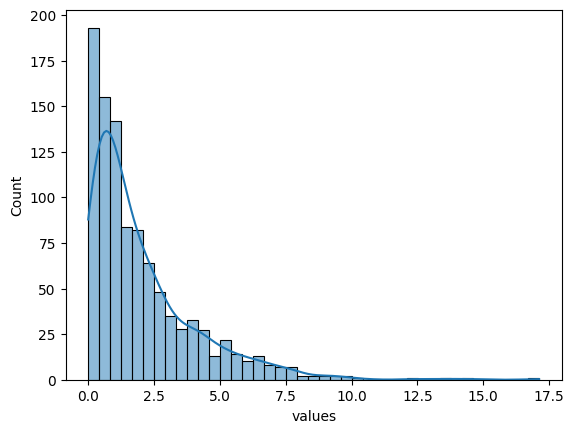

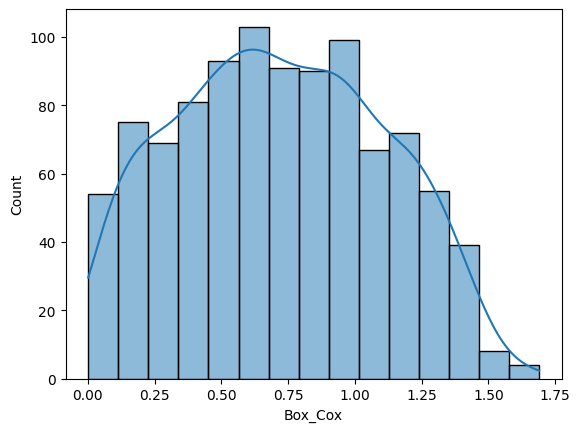

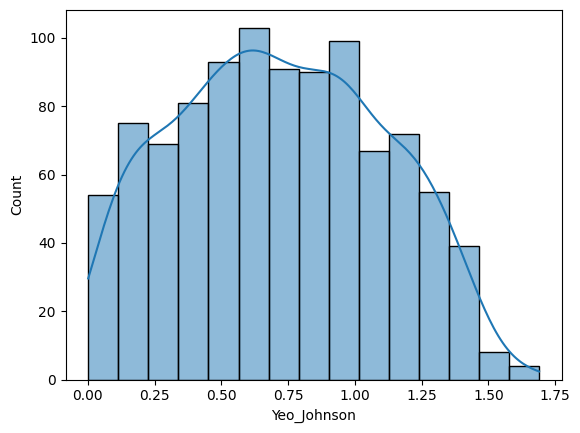

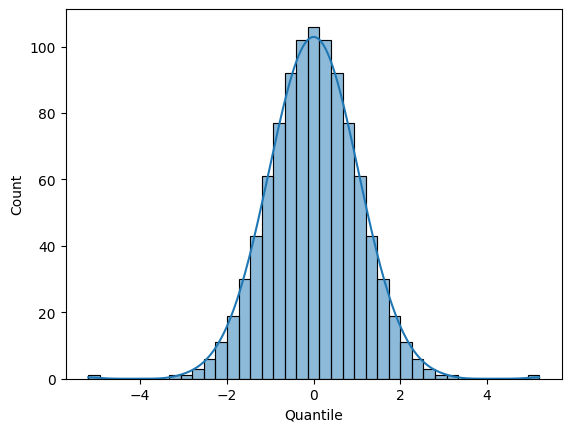

In [15]:
# creata hostograms for all columns using sns.hist and kde=true use a for loop
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

---
# Normalization

### L2 Normalization:

Rescales each sample (row) to have unit norm. This type of normalization is often used when dealing with text data.
The L2 norm is calculated as the square root of the sum of the squared vector values.

In [16]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l2')
print(normalizer.fit_transform(data))

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


### L1 Normalization:

Also rescales each sample (row) but with a different approach, ensuring the sum of the absolute values is 1 in each row.
The L1 norm is calculated as the sum of the absolute vector values.
Example:

In [17]:
from sklearn.preprocessing import Normalizer
data = [[1, 1, 1], [1, 1, 0], [1, 0, 0]]
normalizer = Normalizer(norm='l1')
print(normalizer.fit_transform(data))

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


#### 1. Z-score normalization
   1. Standard Scalar
#### 2. Min-Max normalization
   1. Min-Max Scalar

# Log Transformation

In [18]:
import pandas as pd
import numpy as np

# example dataset with skewed values
df = { "Values": [1,5,10,20,50,100,200,500,1000,2000,5000,10000,20000,50000,100000]}
df = pd.DataFrame(df)
df.head()

,Values
0,1
1,5
2,10
3,20
4,50


In [40]:
df['log_values'] = np.log(df['Values'])
df

,Values,log_values
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,20,2.995732
4,50,3.912023
5,100,4.605170
6,200,5.298317
7,500,6.214608
8,1000,6.907755
9,2000,7.600902


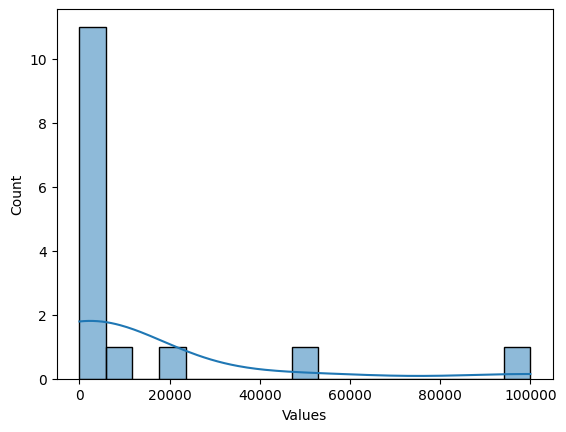

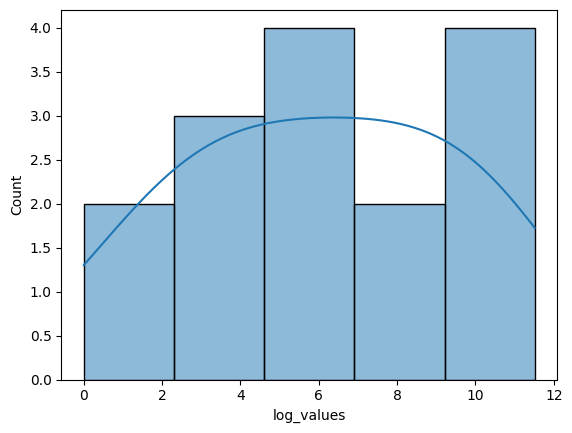

In [41]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

#### Scaling vs Normalization
`Scaling` is to change the range of the data without changing its shape of distribution. It is important for sensitive models like `SVMs` or `KNN`\
`Method`: Standard Scaling, Max-Abs Scaling, Min-Max Scaling, Robust Scaling

`Normalization` is to change the shape of the data also changing its range of distribution. It used to transform skewed data to normal distribution.\
`Method`: Box-Cox Transformation, Yeo-Johnson Transformation, Quantile Transformation. 